# Cascading failures in power grids

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.sparse as sp
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import pickle
import json
from datetime import datetime
import scipy.stats as stats
import itertools

In [2]:
options = {
    'node_color': 'black',
    'node_size': 10,
    'width': 2,
    'with_labels' : False, 
    'edge_cmap' : plt.cm.plasma,
}

In [3]:
with open('Topology.json') as json_data:
    t = json.load(json_data)
    #print(t)

In [4]:
geoGraph = nx.MultiGraph()
geoGraph.add_edges_from(t)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

C:\Users\Laura\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


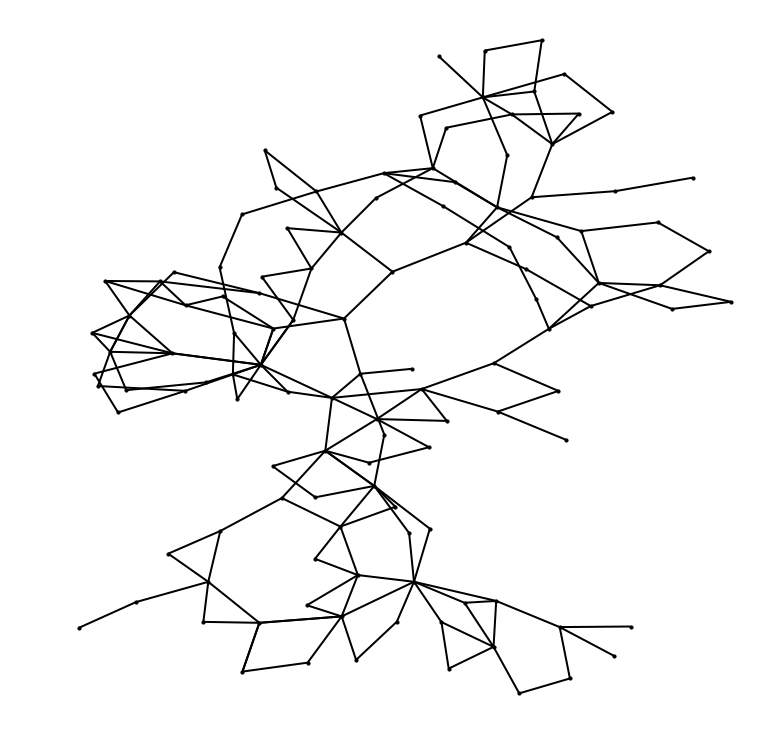

In [5]:
geoLayout = nx.kamada_kawai_layout(geoGraph)
#layout = nx.spring_layout(dualGeoGraph)
plt.figure(figsize=(10,10),frameon=False)
nx.draw(geoGraph, pos= geoLayout, **options)
plt.show()

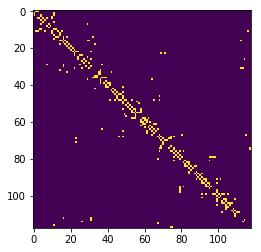

In [6]:
geoSimpleGraph = nx.Graph()
geoSimpleGraph.add_edges_from(t)
At = nx.adjacency_matrix(geoSimpleGraph)
#print(At)
adjGeoSimpleGraph = np.array(At.toarray())
#print(adjGeoGraph)
plt.imshow(adjGeoSimpleGraph)

average degree: 3.152542372881356


C:\Users\Laura\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, '$P(D = d)$')

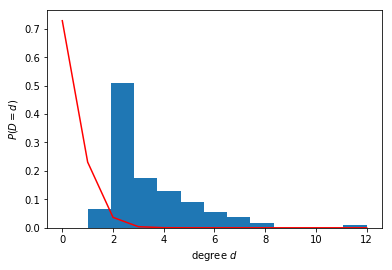

In [7]:
# compare the empirical degree distribution with binomial distribution
dictionarySeq = geoGraph.degree()
degreeSeq = dict(dictionarySeq).values()
degreeList = list(degreeSeq)
sumOfDegrees = 0
maxDegree = 0
nNodes = 0
for deg in degreeList:
    sumOfDegrees = sumOfDegrees + deg
    nNodes = nNodes + 1
    if deg>maxDegree:
        maxDegree=deg
averageDegree = sumOfDegrees/nNodes
print('average degree:', averageDegree)
prob = stats.poisson.pmf(range(maxDegree+1), 1/averageDegree)
plt.hist(degreeList, normed=True, bins=maxDegree)
plt.plot(range(maxDegree+1), prob, 'r-')
plt.xlabel(r'degree $d$')
plt.ylabel(r'$P(D = d)$')

In [8]:
# Compute graph transitivity, the fraction of all possible triangles present in the graph.
transitivity = nx.algorithms.cluster.transitivity(geoSimpleGraph)
print('Transitivity', transitivity)

Transitivity 0.13555992141453832


(8, 9)
(9, 10)
(12, 117)
(68, 116)
(71, 73)
(85, 86)
(86, 87)
(110, 111)
(110, 112)


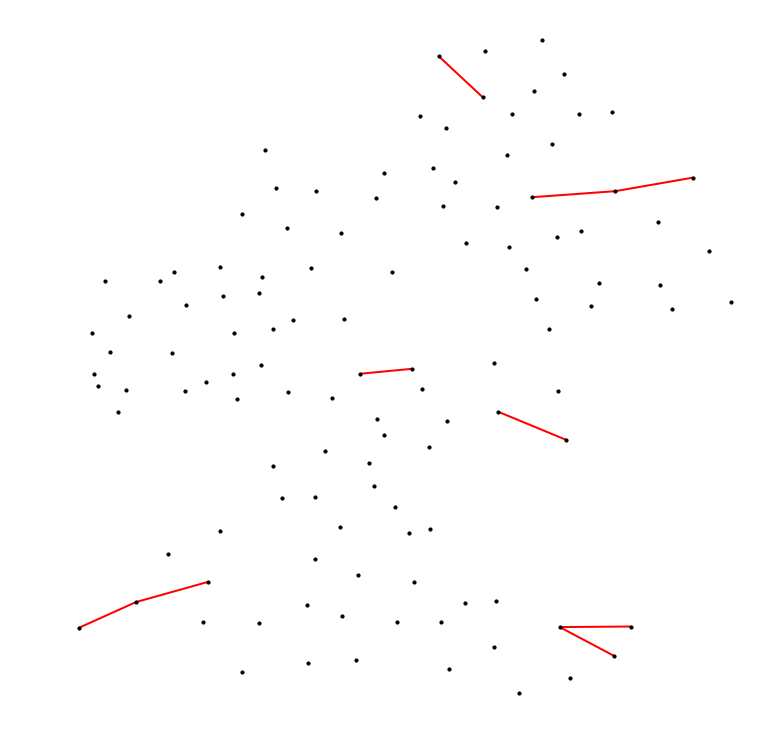

In [9]:
bridgeGraph = nx.Graph()
bridgeGraph.add_nodes_from(geoGraph.nodes())
for edge in nx.algorithms.bridges(geoSimpleGraph):
    print(edge)
    bridgeGraph.add_edge(edge[0],edge[1])
plt.figure(figsize=(10,10),frameon=False)
nx.draw(bridgeGraph, pos= geoLayout, edge_color = 'r', **options)
plt.show()

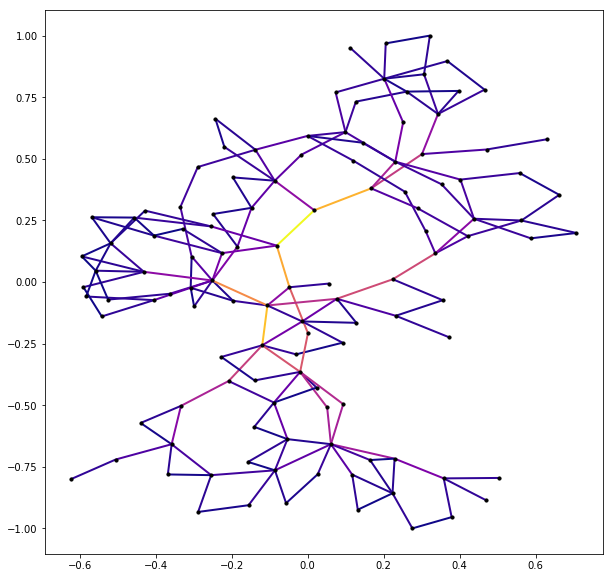

In [10]:
# Compute betweenness centrality for edges.Betweenness centrality of an edge e 
# is the sum of the fraction of all-pairs shortest paths that pass through e
dictEdgeBetweenness = nx.algorithms.centrality.edge_betweenness_centrality(geoSimpleGraph)
plt.figure(figsize=(10,10),frameon=False)
vmax = 0
for v in list(dictEdgeBetweenness.values()):
    vmax = max(v,vmax)
nx.draw_networkx(geoSimpleGraph, pos=geoLayout, edge_color=list(dictEdgeBetweenness.values()), edge_vmin=0, edge_vmax=vmax, **options)
plt.show()

In [11]:
with open('Cascade.json') as json_data:
    c = json.load(json_data)
    #print(c)

In [13]:
cNew = c
for l in cNew:
    #print(l)
    size = len(l)
    for ele in range(size):
        if type(l[ele]) is int:
            #print('found')
            l[ele]=[l[ele]]
            #print(l)

In [14]:
dualGeoGraph = nx.Graph()
i=0
for oneEdge in t:
    i=i+1
    j=0
    for otherEdge in t:
        j=j+1
        if oneEdge[0]==otherEdge[0] or oneEdge[0]==otherEdge[1] or oneEdge[1]==otherEdge[0] or oneEdge[1]==otherEdge[1]:
                dualGeoGraph.add_edge(i,j)

layout = nx.kamada_kawai_layout(dualGeoGraph)
#layout = nx.spring_layout(dualGeoGraph)

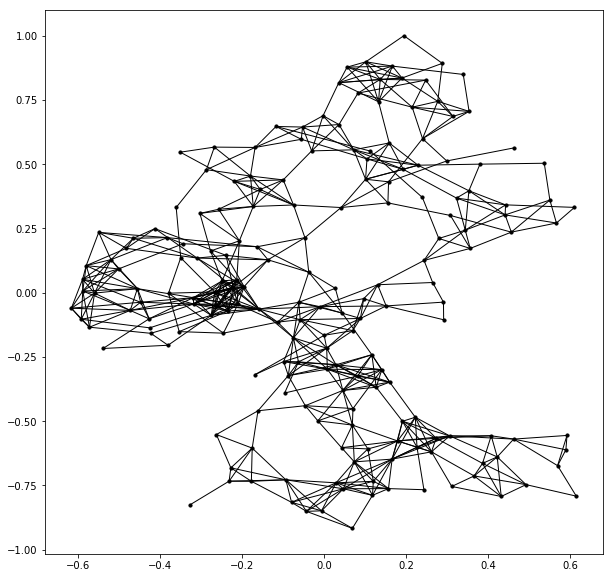

In [15]:
plt.figure(figsize=(10,10),frameon=False)
options8 = {
    'node_color': 'black',
    'node_size': 10,
    'width': 1,
    'with_labels' : False, 
    'edge_cmap' : plt.cm.plasma,
}
nx.draw_networkx(dualGeoGraph, pos=layout, **options8)
plt.show()

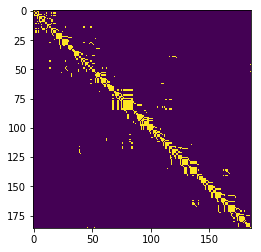

In [16]:
Ad = nx.adjacency_matrix(dualGeoGraph)
#print(Ad)
adjDualGraph = np.array(Ad.toarray())
#print(adjDualGraph)
plt.imshow(adjDualGraph)

average degree: 8.290322580645162


Text(0, 0.5, '$P(D = d)$')

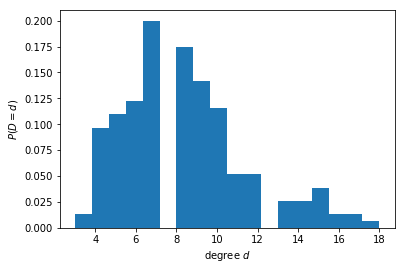

In [17]:
# compare the empirical degree distribution with binomial distribution
dictionarySeq = dualGeoGraph.degree()
degreeSeq = dict(dictionarySeq).values()
degreeList = list(degreeSeq)
sumOfDegrees = 0
maxDegree = 0
nNodes = 0
for deg in degreeList:
    sumOfDegrees = sumOfDegrees + deg
    nNodes = nNodes + 1
    if deg>maxDegree:
        maxDegree=deg
averageDegree = sumOfDegrees/nNodes
print('average degree:', averageDegree)
prob = stats.poisson.pmf(range(maxDegree+1), 1/averageDegree)
plt.hist(degreeList, normed=True, bins=maxDegree)
#plt.plot(range(maxDegree+1), prob, 'r-')
plt.xlabel(r'degree $d$')
plt.ylabel(r'$P(D = d)$')

In [18]:
# Compute graph transitivity, the fraction of all possible triangles present in the graph.
transitivity = nx.algorithms.cluster.transitivity(dualGeoGraph)
print('Transitivity', transitivity)

Transitivity 0.598036748049333


In [19]:
adjDualGraph.shape 

(186, 186)

In [20]:
influenceGraph = nx.Graph()
numTrigger = len(cNew)
print(numTrigger)
for node in range(1,numTrigger+1):
    influenceGraph.add_node(node)
for i in range(0,numTrigger):
    trigger = i+1
    cascade = cNew[i]
    numStages=len(cascade)
    if numStages>0:
        for failed in cascade[0]:
            influenceGraph.add_edge(trigger,failed)
        for stage in range(0,numStages-1):
            for cause in cascade[stage]:
                for failed in cascade[stage+1]:
                    influenceGraph.add_edge(cause,failed)

186


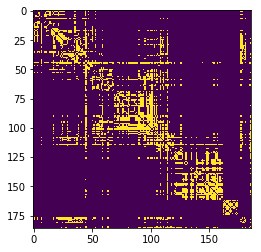

In [21]:
Ai = nx.adjacency_matrix(influenceGraph)
#print(Ai)
adjInfluenceGraph = np.array(Ai.toarray())
#print(adjInfluenceGraph)
plt.imshow(adjInfluenceGraph)

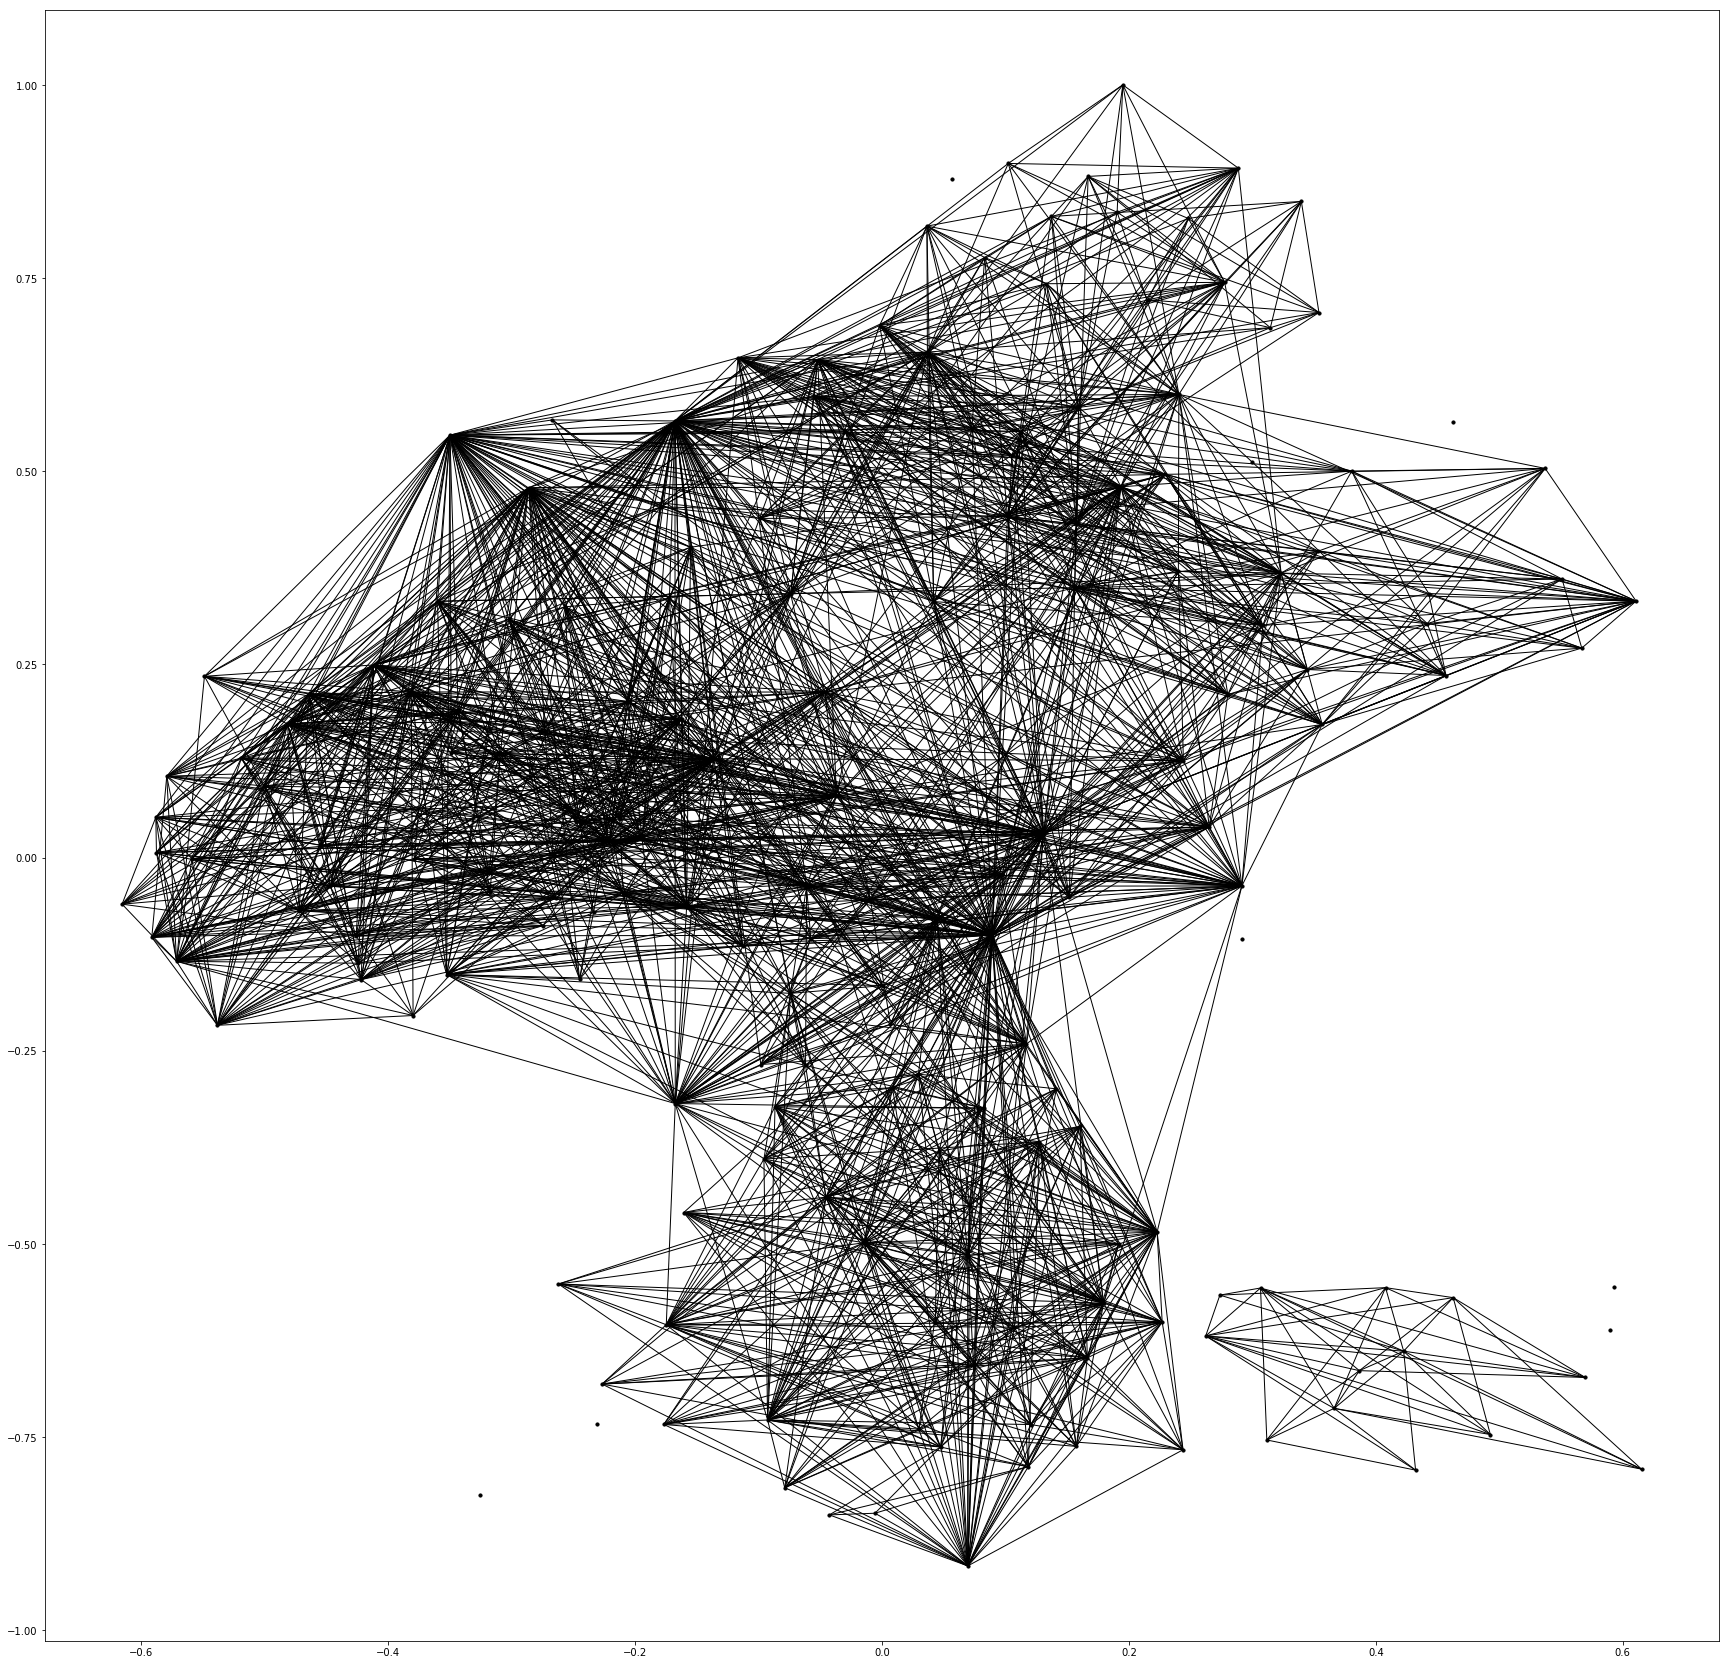

In [22]:
plt.figure(figsize=(30, 30),frameon=False)
nx.draw_networkx(influenceGraph, pos=layout, **options8)
plt.show()

average degree: 21.838709677419356


Text(0, 0.5, '$P(D = d)$')

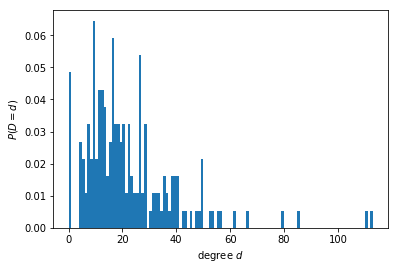

In [23]:
# compare the empirical degree distribution with binomial distribution
dictionarySeq = influenceGraph.degree()
degreeSeq = dict(dictionarySeq).values()
degreeList = list(degreeSeq)
sumOfDegrees = 0
maxDegree = 0
nNodes = 0
for deg in degreeList:
    sumOfDegrees = sumOfDegrees + deg
    nNodes = nNodes + 1
    if deg>maxDegree:
        maxDegree=deg
averageDegree = sumOfDegrees/nNodes
print('average degree:', averageDegree)
prob = stats.poisson.pmf(range(maxDegree+1), 1/averageDegree)
plt.hist(degreeList, normed=True, bins=maxDegree)
#plt.plot(range(maxDegree+1), prob, 'r-')
plt.xlabel(r'degree $d$')
plt.ylabel(r'$P(D = d)$')

In [24]:
# Compute graph transitivity, the fraction of all possible triangles present in the graph.
transitivity = nx.algorithms.cluster.transitivity(influenceGraph)
print('Transitivity', transitivity)

Transitivity 0.41619450317124734


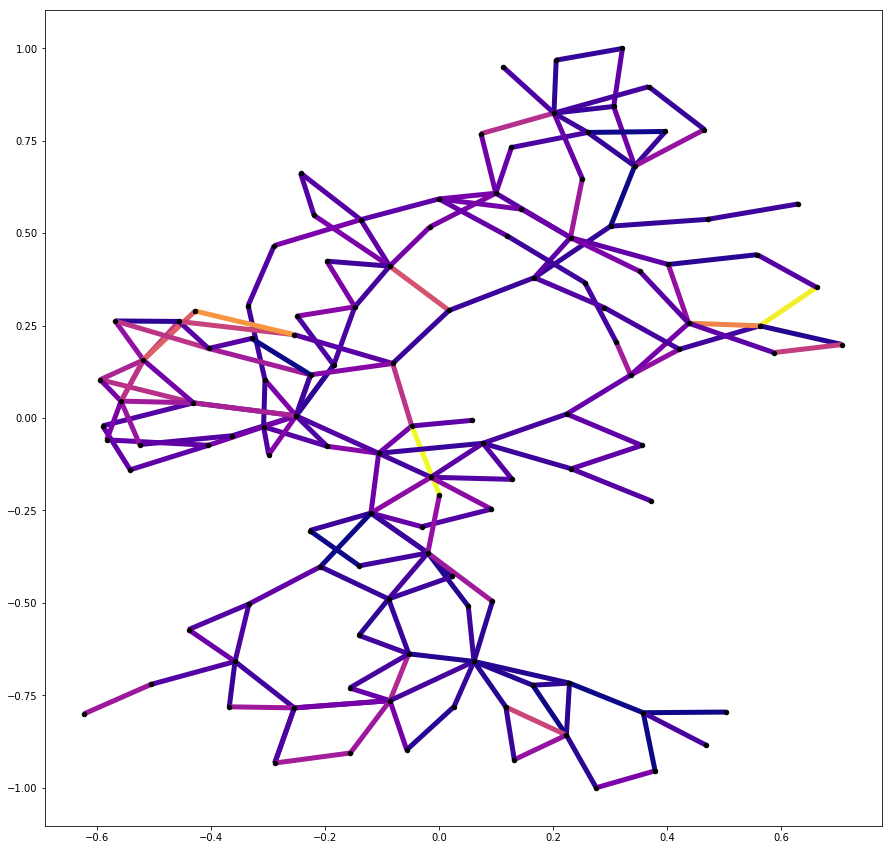

In [25]:
# Compute the degree centrality for nodes.
#The degree centrality for a node v is the fraction of nodes it is connected to. 
# Edges of geoGraph are coloured according to the degree centrality of the corresponding node in the influence graph.
dictDegreeCentrality= nx.algorithms.centrality.degree_centrality(influenceGraph)
plt.figure(figsize=(15,15),frameon=False)
vmax = 0
for v in list(dictDegreeCentrality.values()):
    vmax = max(v,vmax)
options6 = {
    'node_color': 'black',
    'node_size': 20,
    'width': 5,
    'with_labels' : False, 
    'edge_cmap' : plt.cm.plasma,
}
nx.draw_networkx(geoGraph, pos=geoLayout, edgelist = geoGraph.edges(), edge_color=list(dictDegreeCentrality.values()), edge_vmin=0, edge_vmax=vmax, **options6)
plt.show()

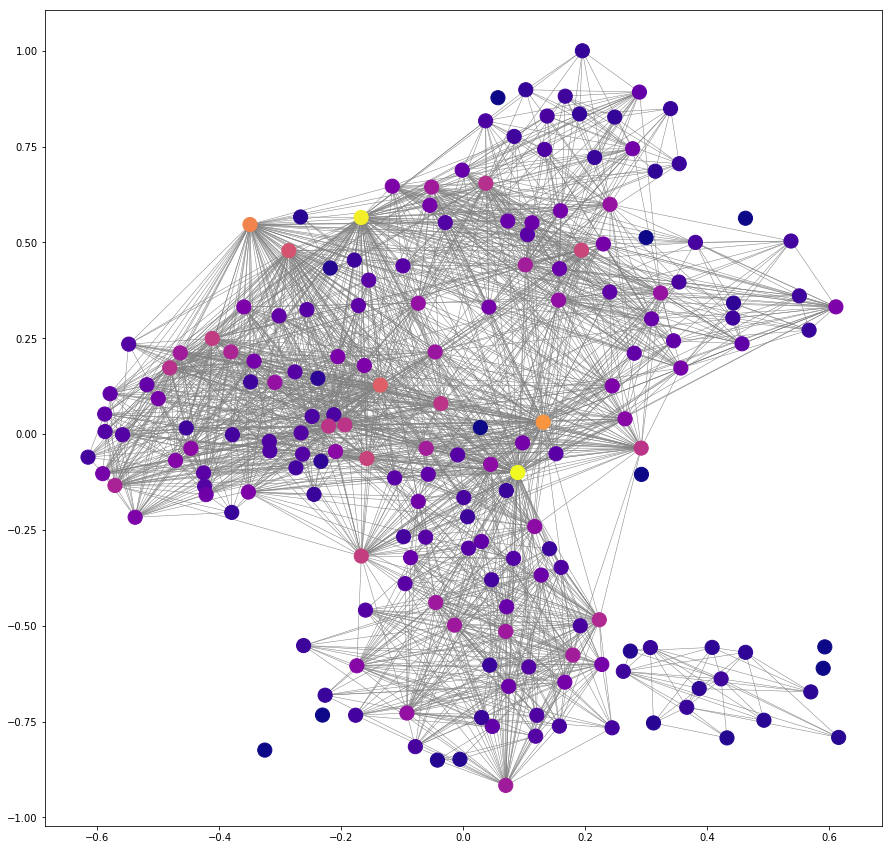

In [26]:
plt.figure(figsize=(15,15),frameon=False)
options7 = {
    'node_size': 200,
    'width': 0.5,
    'edge_color' : 'grey',
    'with_labels' : False,
    'cmap' : plt.cm.plasma,
}
nx.draw_networkx(influenceGraph, pos=layout, node_color=list(dictDegreeCentrality.values()), node_vmin=0, node_vmax=vmax, **options7)
plt.show()

In [27]:
# The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. 
# The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality,
#at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed 
# and the result can be depicted as a dendrogram. To get only the first k tuples of communities, use itertools.islice().
k = 2
arcColours = [0 for _ in range(186)]
colour = 0
comp = nx.algorithms.community.centrality.girvan_newman(influenceGraph)


In [28]:
communities = next(comp)
communities = next(comp)
for c in communities:
    colour = colour+1
    for i in c:
        arcColours[i-1] = colour    

In [29]:
print(max(arcColours))
dictInfNodeColour = {}
dictGeoArcColour = {}
i=1;
for colour in arcColours:
    dictInfNodeColour[i] = colour
    dictGeoArcColour[i] = colour
    i=i+1

13


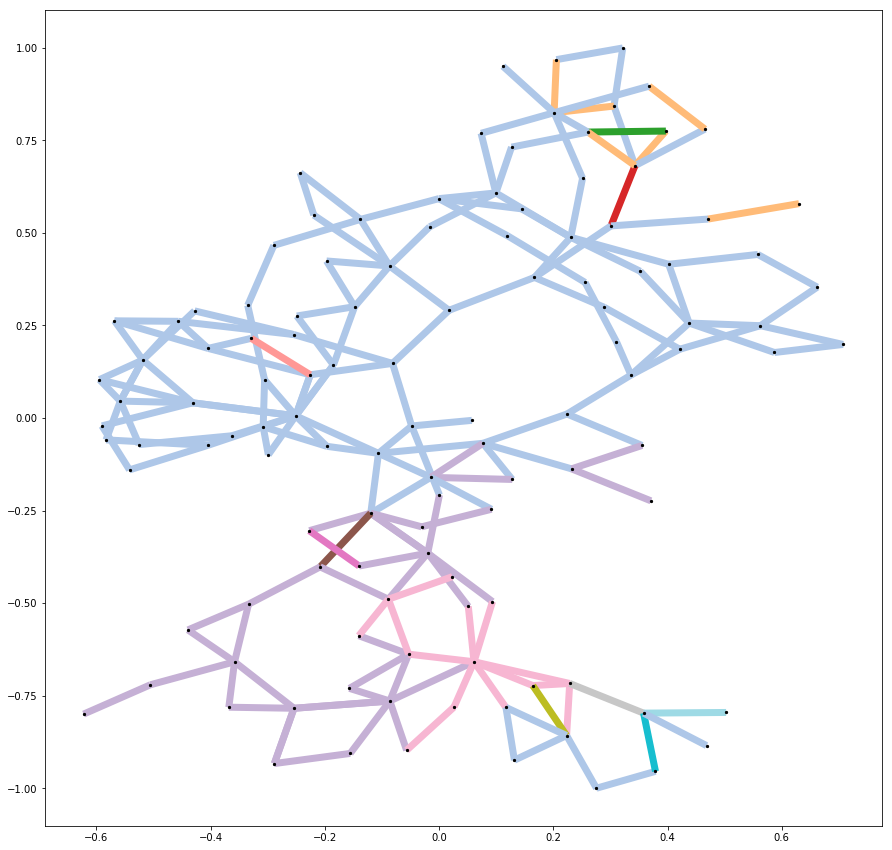

In [30]:
plt.figure(figsize=(15,15),frameon=False)
vmax = max(arcColours)
options2 = {
    'node_color': 'black',
    'node_size': 5,
    'width': 7,
    'with_labels' : False, 
    'edge_cmap' : plt.cm.tab20,
}
nx.draw_networkx(geoGraph, pos=geoLayout, edge_color=arcColours, edge_vmin=0, edge_vmax=vmax, **options2)
plt.show()


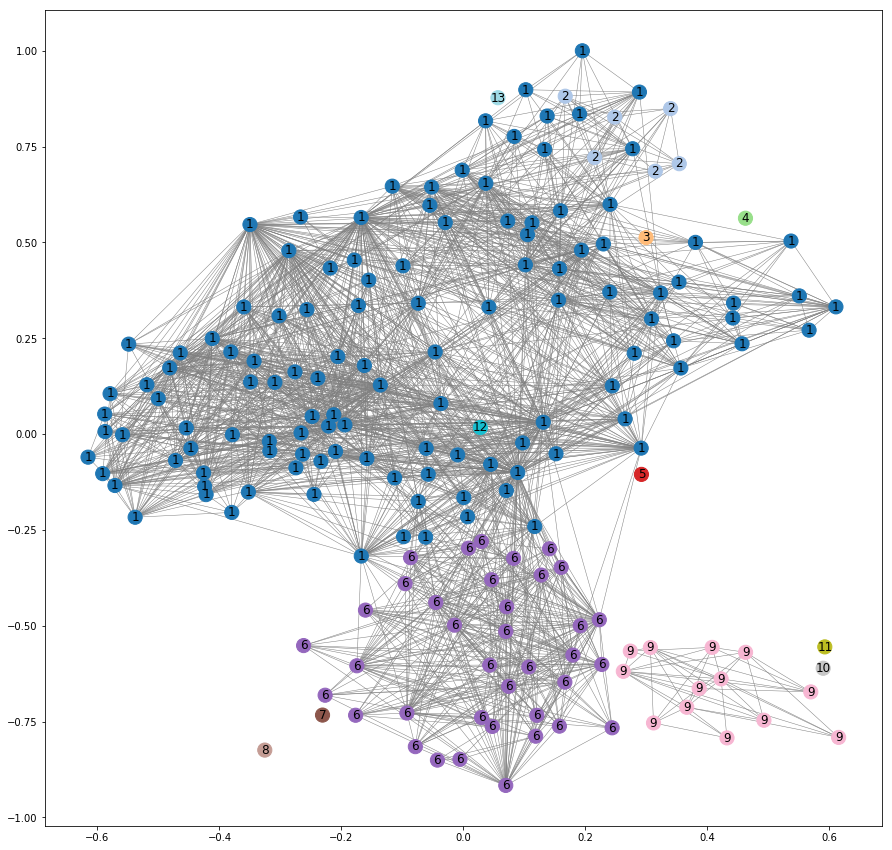

In [31]:
plt.figure(figsize=(15,15),frameon=False)
options3 = {
    'node_size': 200,
    'width': 0.5,
    'edge_color' : 'grey',
    'with_labels' : True,
    'cmap' : plt.cm.tab20,
}
nx.draw_networkx(influenceGraph, pos=layout, node_color=arcColours, node_vmin=0, node_vmax=vmax, labels= dictInfNodeColour, **options3)
plt.show()

[[1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 1 1]]


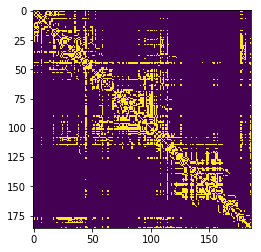

In [32]:
 diffAdj = np.abs(adjDualGraph - adjInfluenceGraph)
 print(diffAdj)
 plt.imshow(diffAdj)

# Preprocessing/Train-Test Split


In [33]:
edgesInfluence = list(influenceGraph.edges)
# print(edgesInfluence)
numTrain = len(edgesInfluence)//2
print(numTrain)

1015


In [34]:
# create training set containing edges and test set containing edges
train_edges = []
test_edges = []
for i in range(len(edgesInfluence)):
    if i%2==0:
        train_edges.append(edgesInfluence[i])
    else:
        test_edges.append(edgesInfluence[i])


g_train = nx.from_edgelist(train_edges)
for node in range(1,numTrigger+1):
    g_train.add_node(node)

# create test set of negative edges
test_edges_false = []
# Ai = nx.adjacency_matrix(influenceGraph)
adj = nx.adjacency_matrix(influenceGraph)
adj_sparse = nx.to_scipy_sparse_matrix(influenceGraph)
n = influenceGraph.number_of_nodes()
while len(test_edges_false) != len(test_edges):
    u = np.random.randint(n)
    v = np.random.randint(n)
    if u != v and adj_sparse[u,v] == 0:
    #if u != v and (u,v) not in g.edges():
        test_edges_false.append((u,v))

In [35]:
# Inspect train/test split
print("Total nodes:", adj_sparse.shape[0])
print("Total edges:", int(adj_sparse.nnz/2)) # adj is symmetric, so nnz (num non-zero) = 2*num_edges
print ("Training edges (positive):", len(train_edges))
#print "Training edges (negative):", len(train_edges_false)
#print "Validation edges (positive):", len(val_edges)
#print "Validation edges (negative):", len(val_edges_false)
print("Test edges (positive):", len(test_edges))
print("Test edges (negative):", len(test_edges_false))

Total nodes: 186
Total edges: 2031
Training edges (positive): 1016
Test edges (positive): 1015
Test edges (negative): 1015


In [36]:
def get_roc_score(edges_pos, edges_neg, score_matrix):
    # Store positive edge predictions, actual values
    preds_pos = []
    pos = []
    for edge in edges_pos:
        preds_pos.append(score_matrix[edge[0]-1, edge[1]-1]) # predicted score
        pos.append(adj_sparse[edge[0]-1, edge[1]-1]) # actual value (1 for positive)
        
    # Store negative edge predictions, actual values
    preds_neg = []
    neg = []
    for edge in edges_neg:
        preds_neg.append(score_matrix[edge[0]-1, edge[1]-1]) # predicted score
        neg.append(adj_sparse[edge[0]-1, edge[1]-1]) # actual value (0 for negative)
        
    # Calculate scores
    preds_all = np.hstack([preds_pos, preds_neg])
    labels_all = np.hstack([np.ones(len(preds_pos)), np.zeros(len(preds_neg))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)
    return roc_score, ap_score

# Adamic Adar

In [37]:
# Compute Adamic-Adar indexes from g_train
aa_matrix = np.zeros(adj.shape)
for u, v, p in nx.adamic_adar_index(g_train): # (u, v) = node indices, p = Adamic-Adar index
    aa_matrix[u-1][v-1] = p
    aa_matrix[v-1][u-1] = p # make sure it's symmetric
    
# Normalize array
aa_matrix = aa_matrix / aa_matrix.max()

In [38]:
# list(nx.adamic_adar_index(g_train))

In [39]:
# len(g_train.nodes())

In [40]:
# Calculate ROC AUC and Average Precision
aa_roc, aa_ap = get_roc_score(test_edges, test_edges_false, aa_matrix)

print('Adamic-Adar Test ROC score: ', str(aa_roc))
print('Adamic-Adar Test AP score: ', str(aa_ap))

Adamic-Adar Test ROC score:  0.9023334708437477
Adamic-Adar Test AP score:  0.8838025743164568


In [41]:
# Apply prediction to the influence graph
aaInfluenceMatrix = np.zeros(adj.shape)
for u, v, p in nx.adamic_adar_index(influenceGraph): # (u, v) = node indices, p = Adamic-Adar index
    aaInfluenceMatrix[u-1][v-1] = p
    aaInfluenceMatrix[v-1][u-1] = p # make sure it's symmetric
    
# Normalize array
aaInfluenceMatrix = aaInfluenceMatrix / aaInfluenceMatrix.max()

In [42]:
newInfluenceMatrix = np.zeros(adj.shape)
predInfluenceGraph = nx.Graph()
predInfluenceGraph.add_nodes_from(influenceGraph.nodes())
predInfluenceGraph.add_edges_from(influenceGraph.edges())
newInfluenceEdges = nx.Graph()
newInfluenceEdges.add_nodes_from(influenceGraph.nodes())
for i in range(adj.shape[0]):
    for j in range(adj.shape[1]):
        if aaInfluenceMatrix[i][j]>0.4 and adjInfluenceGraph[i][j]==0:
            newInfluenceMatrix[i][j]=aaInfluenceMatrix[i][j]   
            predInfluenceGraph.add_edge(i+1,j+1,weight=aaInfluenceMatrix[i][j])
            newInfluenceEdges.add_edge(i+1,j+1,weight=aaInfluenceMatrix[i][j])

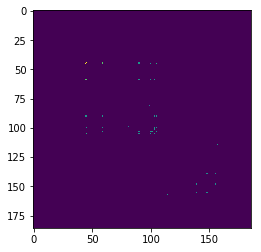

In [43]:
plt.imshow(newInfluenceMatrix)

C:\Users\Laura\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


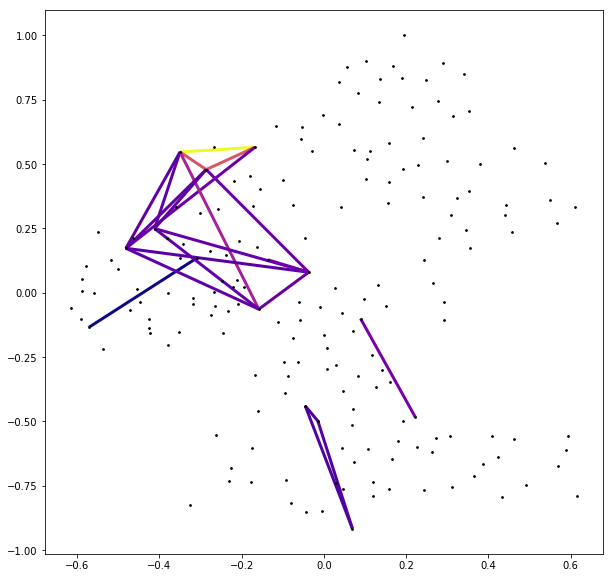

In [44]:
options4 = {
    'node_color': 'black',
    'node_size': 3,
    'width': 3,
    'with_labels' : False, 
    'edge_cmap' : plt.cm.plasma,
}
edges,weights = zip(*nx.get_edge_attributes(newInfluenceEdges,'weight').items())
plt.figure(figsize=(10, 10),frameon=False)
nx.draw_networkx(newInfluenceEdges, pos=layout, edgelist=edges, edge_color=weights, **options4)
plt.show()

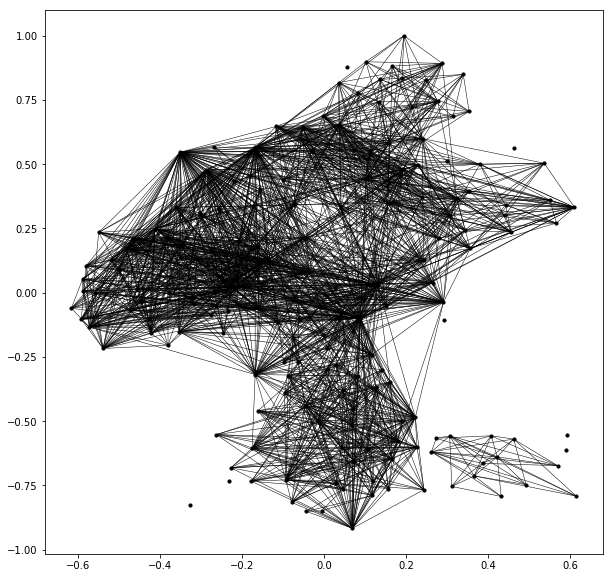

In [45]:
plt.figure(figsize=(10, 10),frameon=False)
options9 = {
    'node_color': 'black',
    'node_size': 10,
    'width': 0.5,
    'with_labels' : False, 
    'edge_cmap' : plt.cm.plasma,
}
nx.draw_networkx(predInfluenceGraph, pos=layout, **options9)
plt.show()

In [46]:
#print(nx.adjacency_matrix(predInfluenceGraph))

# Jaccard Coefficient


In [47]:
# Compute Jaccard Coefficients from g_train
jc_matrix = np.zeros(adj.shape)
for u, v, p in nx.jaccard_coefficient(g_train): # (u, v) = node indices, p = Jaccard coefficient
    jc_matrix[u-1][v-1] = p
    jc_matrix[v-1][u-1] = p # make sure it's symmetric
    
# Normalize array
jc_matrix = jc_matrix / jc_matrix.max()

In [48]:
# Calculate ROC AUC and Average Precision
jc_roc, jc_ap = get_roc_score(test_edges, test_edges_false, jc_matrix)

print('Jaccard Coefficient Test ROC score: ', str(jc_roc))
print('Jaccard Coefficient Test AP score: ', str(jc_ap))

Jaccard Coefficient Test ROC score:  0.8698090223009536
Jaccard Coefficient Test AP score:  0.8326781714757341


In [49]:
# Apply prediction to the influence graph
jcInfluenceMatrix = np.zeros(adj.shape)
for u, v, p in nx.jaccard_coefficient(influenceGraph): # (u, v) = node indices, p = Adamic-Adar index
    jcInfluenceMatrix[u-1][v-1] = p
    jcInfluenceMatrix[v-1][u-1] = p # make sure it's symmetric
    
# Normalize array
jcInfluenceMatrix = jcInfluenceMatrix / jcInfluenceMatrix.max()

In [50]:
newInfluenceMatrix = np.zeros(adj.shape)
predInfluenceGraph = nx.Graph()
predInfluenceGraph.add_nodes_from(influenceGraph.nodes())
predInfluenceGraph.add_edges_from(influenceGraph.edges())
newInfluenceEdges = nx.Graph()
newInfluenceEdges.add_nodes_from(influenceGraph.nodes())
for i in range(adj.shape[0]):
    for j in range(adj.shape[1]):
        if jcInfluenceMatrix[i][j]>0.4 and adjInfluenceGraph[i][j]==0:
            newInfluenceMatrix[i][j]=jcInfluenceMatrix[i][j]   
            predInfluenceGraph.add_edge(i+1,j+1,weight=jcInfluenceMatrix[i][j])
            newInfluenceEdges.add_edge(i+1,j+1,weight=jcInfluenceMatrix[i][j])

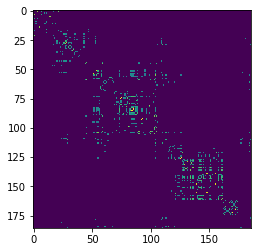

In [51]:
plt.imshow(newInfluenceMatrix)

C:\Users\Laura\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


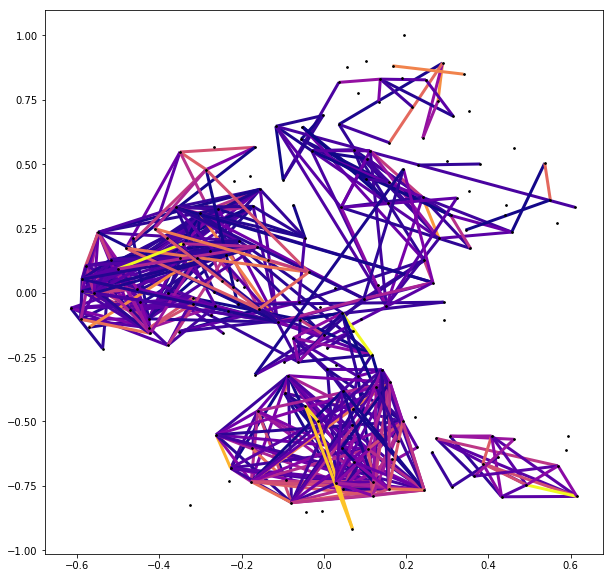

In [52]:
edges,weights = zip(*nx.get_edge_attributes(newInfluenceEdges,'weight').items())
plt.figure(figsize=(10, 10),frameon=False)
nx.draw_networkx(newInfluenceEdges, pos=layout, edgelist=edges, edge_color=weights, **options4)
plt.show()

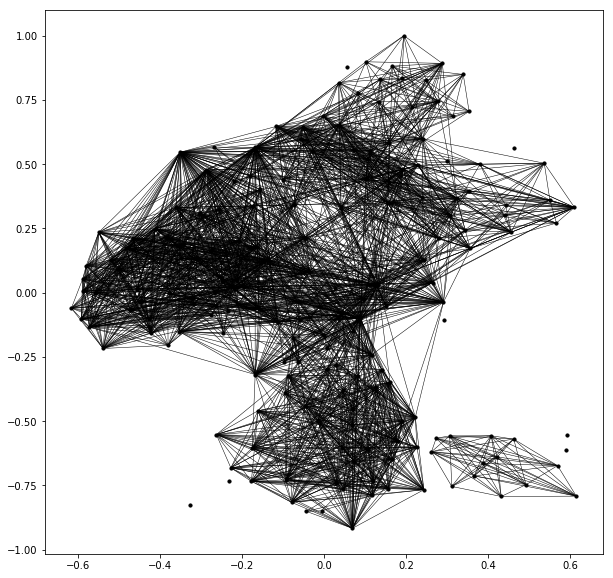

In [53]:
plt.figure(figsize=(10, 10),frameon=False)
nx.draw_networkx(predInfluenceGraph, pos=layout, **options9)
plt.show()

## 5. Preferential Attachment

In [54]:
# Calculate, store Preferential Attachment scores in array
pa_matrix = np.zeros(adj.shape)
for u, v, p in nx.preferential_attachment(g_train): # (u, v) = node indices, p = Jaccard coefficient
    pa_matrix[u-1][v-1] = p
    pa_matrix[v-1][u-1] = p # make sure it's symmetric
    
# Normalize array
pa_matrix = pa_matrix / pa_matrix.max()

In [55]:
# Calculate ROC AUC and Average Precision
pa_roc, pa_ap = get_roc_score(test_edges, test_edges_false, pa_matrix)

print('Preferential Attachment Test ROC score: ', str(pa_roc))
print('Preferential Attachment Test AP score: ', str(pa_ap))

Preferential Attachment Test ROC score:  0.803607464388847
Preferential Attachment Test AP score:  0.7944501380111302


In [56]:
# Apply prediction to the influence graph
paInfluenceMatrix = np.zeros(adj.shape)
for u, v, p in nx.preferential_attachment(influenceGraph): # (u, v) = node indices, p = Adamic-Adar index
    paInfluenceMatrix[u-1][v-1] = p
    paInfluenceMatrix[v-1][u-1] = p # make sure it's symmetric
    
# Normalize array
paInfluenceMatrix = paInfluenceMatrix / paInfluenceMatrix.max()

In [57]:
newInfluenceMatrix = np.zeros(adj.shape)
predInfluenceGraph = nx.Graph()
predInfluenceGraph.add_nodes_from(influenceGraph.nodes())
predInfluenceGraph.add_edges_from(influenceGraph.edges())
newInfluenceEdges = nx.Graph()
newInfluenceEdges.add_nodes_from(influenceGraph.nodes())
for i in range(adj.shape[0]):
    for j in range(adj.shape[1]):
        if paInfluenceMatrix[i][j]>0.4 and adjInfluenceGraph[i][j]==0:
            newInfluenceMatrix[i][j]=paInfluenceMatrix[i][j]   
            predInfluenceGraph.add_edge(i+1,j+1,weight=paInfluenceMatrix[i][j])
            newInfluenceEdges.add_edge(i+1,j+1,weight=paInfluenceMatrix[i][j])

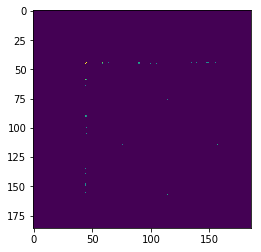

In [58]:
plt.imshow(newInfluenceMatrix)

C:\Users\Laura\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


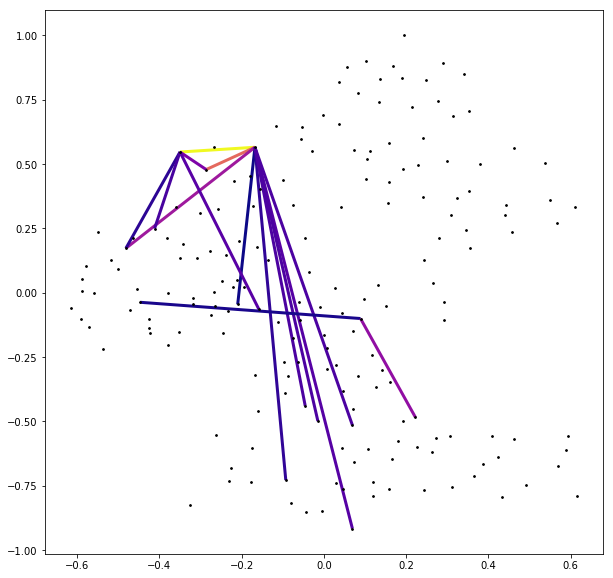

In [59]:
edges,weights = zip(*nx.get_edge_attributes(newInfluenceEdges,'weight').items())
plt.figure(figsize=(10, 10),frameon=False)
nx.draw_networkx(newInfluenceEdges, pos=layout, edgelist=edges, edge_color=weights, **options4)
plt.show()

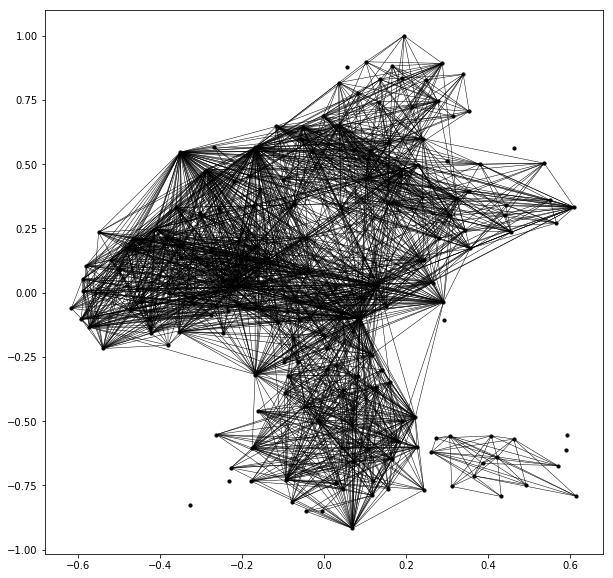

In [60]:
plt.figure(figsize=(10, 10),frameon=False)
nx.draw_networkx(predInfluenceGraph, pos=layout, **options9)
plt.show()

## 6. Resource Allocation Index

In [61]:
# Calculate, store Resource Allocation-Index scores in array
ra_matrix = np.zeros(adj.shape)
for u, v, p in nx.resource_allocation_index(g_train): # (u, v) = node indices, p = Jaccard coefficient
    ra_matrix[u-1][v-1] = p
    ra_matrix[v-1][u-1] = p # make sure it's symmetric
    
# Normalize array
ra_matrix = ra_matrix / ra_matrix.max()

In [62]:
# Calculate ROC AUC and Average Precision
ra_roc, ra_ap = get_roc_score(test_edges, test_edges_false, ra_matrix)

print('Resource Allocation Test ROC score: ', str(ra_roc))
print('Resource Allocation Test AP score: ', str(ra_ap))

Resource Allocation Test ROC score:  0.9089941517629643
Resource Allocation Test AP score:  0.893630455877031


In [63]:
# Apply prediction to the influence graph
raInfluenceMatrix = np.zeros(adj.shape)
for u, v, p in nx.resource_allocation_index(influenceGraph): # (u, v) = node indices, p = Adamic-Adar index
    raInfluenceMatrix[u-1][v-1] = p
    raInfluenceMatrix[v-1][u-1] = p # make sure it's symmetric
    
# Normalize array
raInfluenceMatrix = raInfluenceMatrix / raInfluenceMatrix.max()

In [64]:
newInfluenceMatrix = np.zeros(adj.shape)
predInfluenceGraph = nx.Graph()
predInfluenceGraph.add_nodes_from(influenceGraph.nodes())
predInfluenceGraph.add_edges_from(influenceGraph.edges())
newInfluenceEdges = nx.Graph()
newInfluenceEdges.add_nodes_from(influenceGraph.nodes())
for i in range(adj.shape[0]):
    for j in range(adj.shape[1]):
        if raInfluenceMatrix[i][j]>0.4 and adjInfluenceGraph[i][j]==0:
            newInfluenceMatrix[i][j]=raInfluenceMatrix[i][j]   
            predInfluenceGraph.add_edge(i+1,j+1,weight=raInfluenceMatrix[i][j])
            newInfluenceEdges.add_edge(i+1,j+1,weight=raInfluenceMatrix[i][j])

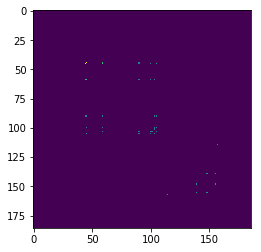

In [65]:
plt.imshow(newInfluenceMatrix)

C:\Users\Laura\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


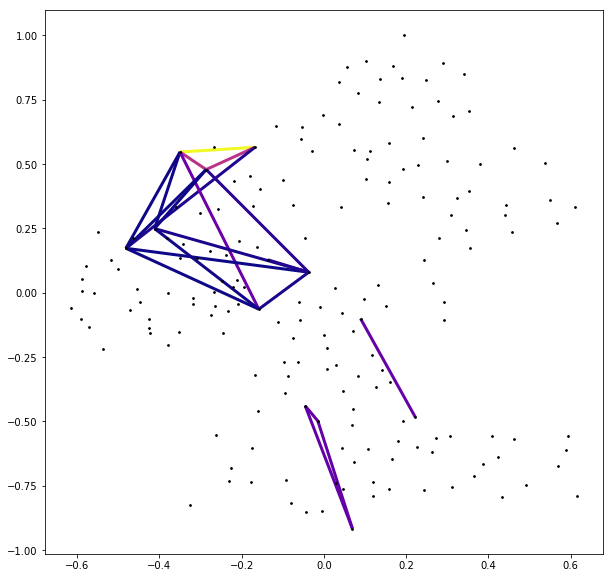

In [66]:
edges,weights = zip(*nx.get_edge_attributes(newInfluenceEdges,'weight').items())
plt.figure(figsize=(10, 10),frameon=False)
nx.draw_networkx(newInfluenceEdges, pos=layout, edgelist=edges, edge_color=weights, **options4)
plt.show()

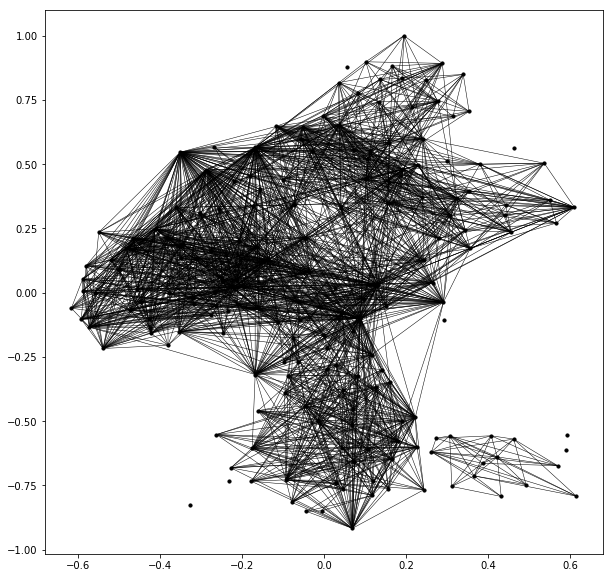

In [67]:
plt.figure(figsize=(10,10),frameon=False)
nx.draw_networkx(predInfluenceGraph, pos=layout, **options9)
plt.show()

# Global similarity indices

## Katz similarity

In [68]:
# Calculate, store Katz similarity-Index scores in array
adjTrial = np.zeros(adj.shape)
for edge in test_edges:
    adjTrial[edge[0]-1][edge[1]-1]=1
    adjTrial[edge[1]-1][edge[0]-1]=1
beta = 0.02
ide = np.eye(adj.shape[0])
sKatz = np.linalg.inv(ide - beta*adjTrial) - ide
katzMatrix = sKatz / sKatz.max()

In [69]:
# Calculate ROC AUC and Average Precision
katz_roc, katz_ap = get_roc_score(test_edges, test_edges_false, katzMatrix)

print('Katz Similarity Test ROC score: ', str(katz_roc))
print('Katz Similarity Test AP score: ', str(katz_ap))

Katz Similarity Test ROC score:  0.9832978232910287
Katz Similarity Test AP score:  0.9701056702384048


In [70]:
adjArray = np.array(adj.toarray())
id = np.eye(adj.shape[0])
sKatz = np.linalg.inv(id - beta*adjArray) - id
katzInfluenceMatrix = sKatz / sKatz.max()
print(katzInfluenceMatrix)

[[0.03401486 0.19969597 0.0144925  ... 0.         0.01176654 0.02648147]
 [0.19969597 0.10161938 0.01706229 ... 0.         0.0239645  0.06737595]
 [0.0144925  0.01706229 0.0275086  ... 0.         0.00976105 0.02105694]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.01176654 0.0239645  0.00976105 ... 0.         0.07571    0.30355516]
 [0.02648147 0.06737595 0.02105694 ... 0.         0.30355516 0.42140444]]


In [85]:
newInfluenceMatrix = np.zeros(adj.shape)
predInfluenceGraph = nx.Graph()
predInfluenceGraph.add_nodes_from(influenceGraph.nodes())
predInfluenceGraph.add_edges_from(influenceGraph.edges())
newInfluenceEdges = nx.Graph()
newInfluenceEdges.add_nodes_from(influenceGraph.nodes())
for i in range(adj.shape[0]):
    for j in range(adj.shape[1]):
        if katzInfluenceMatrix[i][j]>0.4 and adjInfluenceGraph[i][j]==0:
            print(i, j)
            newInfluenceMatrix[i][j]=katzInfluenceMatrix[i][j]   
            predInfluenceGraph.add_edge(i+1,j+1,weight=katzInfluenceMatrix[i][j])
            newInfluenceEdges.add_edge(i+1,j+1,weight=katzInfluenceMatrix[i][j])

44 44
44 45
44 59
44 90
45 44
45 45
45 59
45 90
45 100
45 105
59 44
59 45
59 59
59 100
59 103
90 44
90 45
97 97
98 98
100 45
100 59
100 100
100 105
101 101
101 103
103 59
103 101
103 105
105 45
105 100
105 103
105 105
108 108
111 111
114 114
177 177
185 185


In [91]:
print(adjInfluenceGraph.sum())

4062


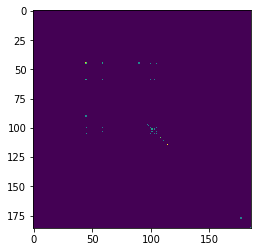

In [72]:
plt.imshow(newInfluenceMatrix)

C:\Users\Laura\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


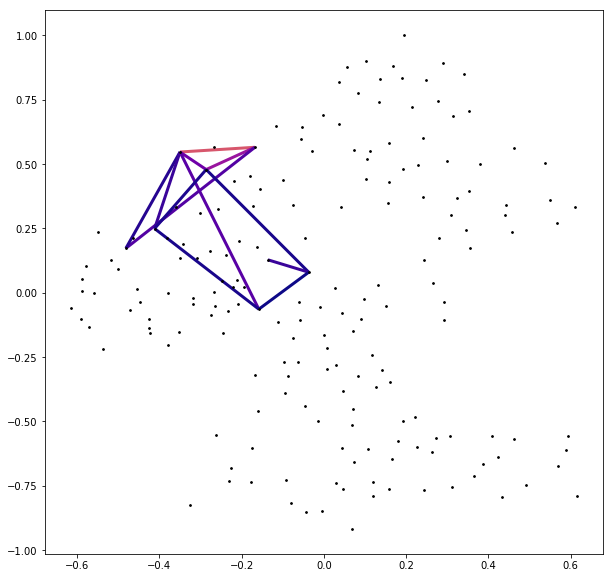

In [73]:
edges,weights = zip(*nx.get_edge_attributes(newInfluenceEdges,'weight').items())
plt.figure(figsize=(10, 10),frameon=False)
nx.draw_networkx(newInfluenceEdges, pos=layout, edgelist=edges, edge_color=weights, **options4)
plt.show()

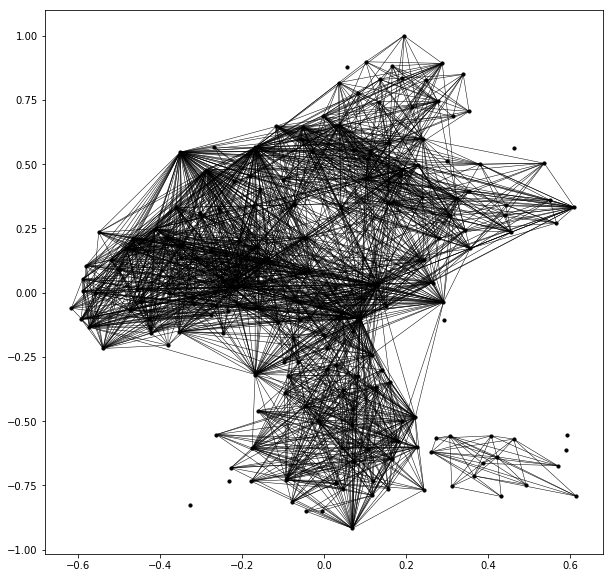

In [74]:
plt.figure(figsize=(10,10),frameon=False)
nx.draw_networkx(predInfluenceGraph, pos=layout, **options9)
plt.show()

# Quasi local indices

## Local path index

In [75]:
# Calculate, store local Path Index scores in array
adjTrial = np.zeros(adj.shape)
for edge in test_edges:
    adjTrial[edge[0]-1][edge[1]-1]=1
    adjTrial[edge[1]-1][edge[0]-1]=1
beta = 0.02
lpTrial= adjTrial + beta*(adjTrial@adjTrial)
lpMatrix = lpTrial / lpTrial.max()

In [76]:
# Calculate ROC AUC and Average Precision
lp_roc, lp_ap = get_roc_score(test_edges, test_edges_false, lpMatrix)

print('Local Path Similarity Test ROC score: ', str(lp_roc))
print('Local Path Similarity Test AP score: ', str(lp_ap))

Local Path Similarity Test ROC score:  0.9839496226552453
Local Path Similarity Test AP score:  0.9717625721348674


In [77]:
adjArray = np.array(adj.toarray())
lp = adjArray + beta*(adjArray@adjArray)
lpInfluenceMatrix = lp / lp.max()
#print(lpInfluenceMatrix)

In [78]:
newInfluenceMatrix = np.zeros(adj.shape)
predInfluenceGraph = nx.Graph()
predInfluenceGraph.add_nodes_from(influenceGraph.nodes())
predInfluenceGraph.add_edges_from(influenceGraph.edges())
newInfluenceEdges = nx.Graph()
newInfluenceEdges.add_nodes_from(influenceGraph.nodes())
for i in range(adj.shape[0]):
    for j in range(adj.shape[1]):
        if lpInfluenceMatrix[i][j]>0.4 and adjInfluenceGraph[i][j]==0:
            newInfluenceMatrix[i][j]=lpInfluenceMatrix[i][j]   
            predInfluenceGraph.add_edge(i+1,j+1,weight=lpInfluenceMatrix[i][j])
            newInfluenceEdges.add_edge(i+1,j+1,weight=lpInfluenceMatrix[i][j])

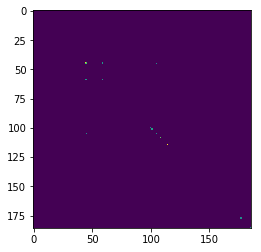

In [79]:
plt.imshow(newInfluenceMatrix)

C:\Users\Laura\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


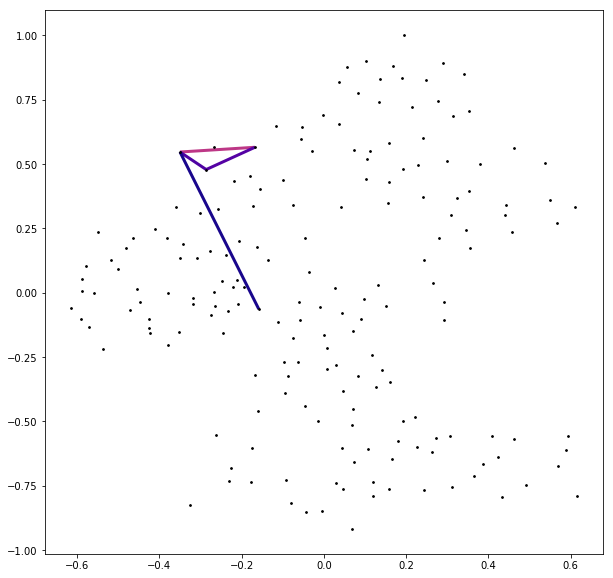

In [80]:
edges,weights = zip(*nx.get_edge_attributes(newInfluenceEdges,'weight').items())
plt.figure(figsize=(10, 10),frameon=False)
nx.draw_networkx(newInfluenceEdges, pos=layout, edgelist=edges, edge_color=weights, **options4)
plt.show()

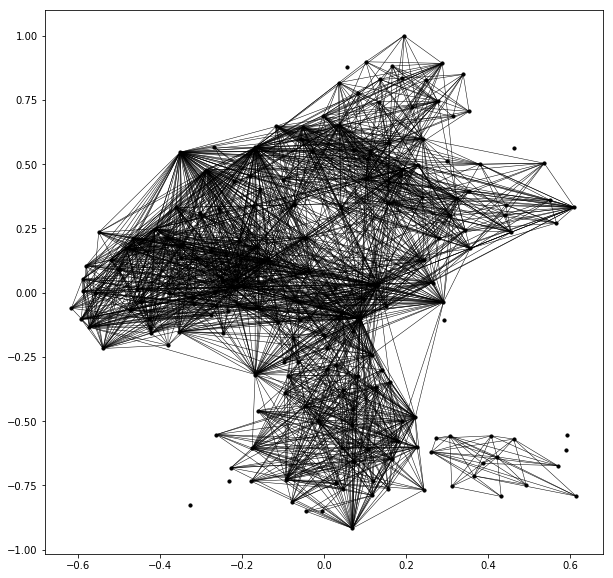

In [81]:
plt.figure(figsize=(10,10),frameon=False)
nx.draw_networkx(predInfluenceGraph, pos=layout, **options9)
plt.show()